## Parameterwahl:
### Listentyp der Elemente:
N : Normale Liste
<br>
F : Optimierte Liste - die Schlüssel der Elemente werden zusätlich in einem Int-Array abgespeichert, um Cache-Misses zu minimieren
<br>
### Algorithmus:
#### InsertionSort O(n^2)
In : InsertionSort
<br>
If : optimiertes InsertionSort - Anzahl der Vertauschungen minimieren
<br>
Im : InsertionSort mit Markierung - keine Zeitverbesserung
#### SelectionSort O(n^2)
S : einfaches SelectionSort - Vergleiche O(n^2), aber Vertauschungen O(n)
#### Quicksort O(n*log(n))*
Qm1f : Pivot: Middle, rekursiv
<br>
Qm1t : Pivot: Middle, iterativ
<br>
Qt1t : Pivot: Median of three, iterativ
<br>
Qt1f : Pivot: Median of three, rekursiv
<br>
Qr1t : Pivot: Random, iterativ
### Instanzen
B : random, reversed und almost sorted
R : nur random
### Kleinstes N [Tausend]
### Schrittweite [Tausend]
### Größtes N [Tausend]
### Optional: Datei zur Abspeicherung der analysierten Informationen

## Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

## Loading Data

In [83]:
raw_data = pd.read_csv('data/Analyse_test.csv', header=None)

raw_data.columns = ['list_type', 'sort', 'permutation', 'size', 'comparison', 'time', 'pivot']

raw_data

,list_type,sort,permutation,size,comparison,time,pivot
0,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,1000000,48385140,226,66975
1,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,2000000,99826223,347,133746
2,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,3000000,152636519,555,200370
3,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,4000000,206313118,698,266775
4,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,5000000,262635946,930,334344
5,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,6000000,315118959,1117,401181
6,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,7000000,370033320,1258,467097
7,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,8000000,429156589,1534,533610
8,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,9000000,485423394,1740,601662
9,FastElements,"OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)",RandomPermutation,10000000,536946932,1919,668094


### Grouping and hierarchical indexing 

In [84]:
data = raw_data.groupby(['list_type', 'sort', 'permutation', 'size']).mean()
data

comparison  \
list_type    sort                                          permutation       size                   
FastElements OptimizedQuickSort(MEDIAN_OF_THREE,Iterative) RandomPermutation 1000000     48385140   
                                                                             2000000     99826223   
                                                                             3000000    152636519   
                                                                             4000000    206313118   
                                                                             5000000    262635946   
                                                                             6000000    315118959   
                                                                             7000000    370033320   
                                                                             8000000    429156589   
                                                                             9000000    485423394   
                                                                             10000000   536946932   
                                                                             11000000   596987531   
                                                                             12000000   652123027   
                                                                             13000000   712679327   
                                                                             14000000   769220305   
                                                                             15000000   829574275   
                                                                             16000000   884495148   
                                                                             17000000   938049040   
                                                                             18000000   994433133   
                                                                             19000000  1050326751   
                                                                             20000000  1119637263   
                                                                             21000000  1169488307   
                                                                             22000000  1229280879   
                                                                             23000000  1281322213   
                                                                             24000000  1351903336   
                                                                             25000000  1399562407   
                                                                             26000000  1465333308   
                                                                             27000000  1512202705   
                                                                             28000000  1581646908   
                                                                             29000000  1644453618   
                                                                             30000000  1704040149   
             QuickSort(MEDIAN_OF_THREE,Iterative)          RandomPermutation 1000000     30927315   
                                                                             2000000     64852452   
                                                                             3000000    100150279   
                                                                             4000000    136179495   
                                                                             5000000    175236366   
                                                                             6000000    210195649   
                                                                             7000000    247384688   
                                                                             8000000    288981771   
                                               

## Functions for Plotting

In [27]:
def show_diagram(title):
    plt.legend()
    plt.title(title)
    plt.xlabel('Größe der Liste')
    plt.ylabel('Laufzeit in Millisekunden')
    plt.grid()

In [28]:
def add_plot(list_type, algo, permutation, label):
    y = data.loc[list_type, algo, permutation]['time'] 
    x = y.index.values
    plt.plot(x, y, label=label)

## Analyse FastInsertionSort

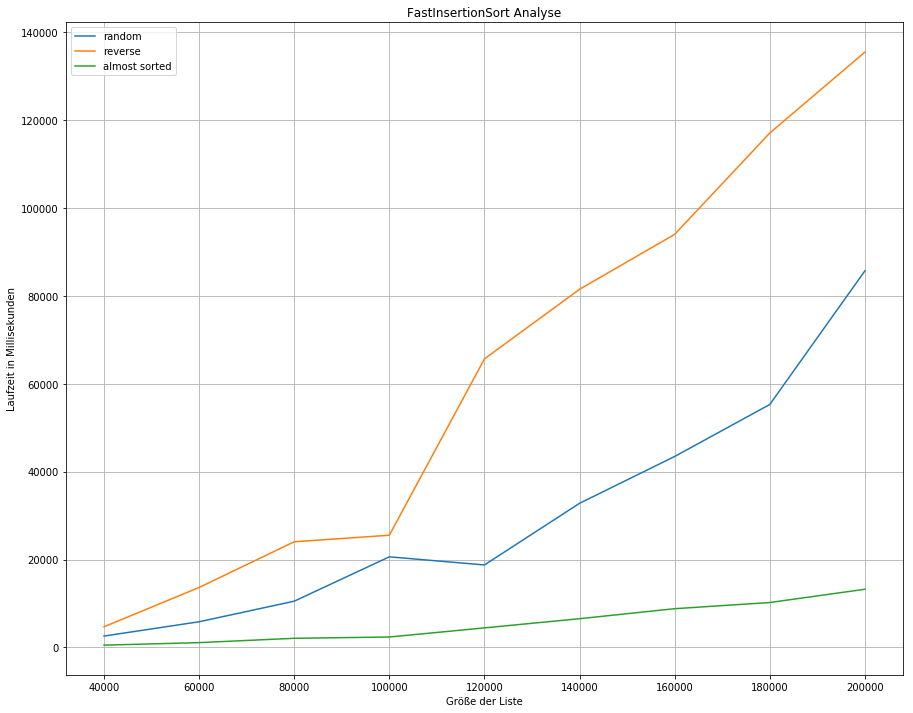

In [29]:
add_plot('FastElements', 'FastInsertionSort', 'RandomPermutation', 'random')
add_plot('FastElements', 'FastInsertionSort', 'ReversePermutation', 'reverse')
add_plot('FastElements', 'FastInsertionSort', 'AlmostSortedPermutation', 'almost sorted')

show_diagram('FastInsertionSort Analyse')

## Analyse SelectionSort

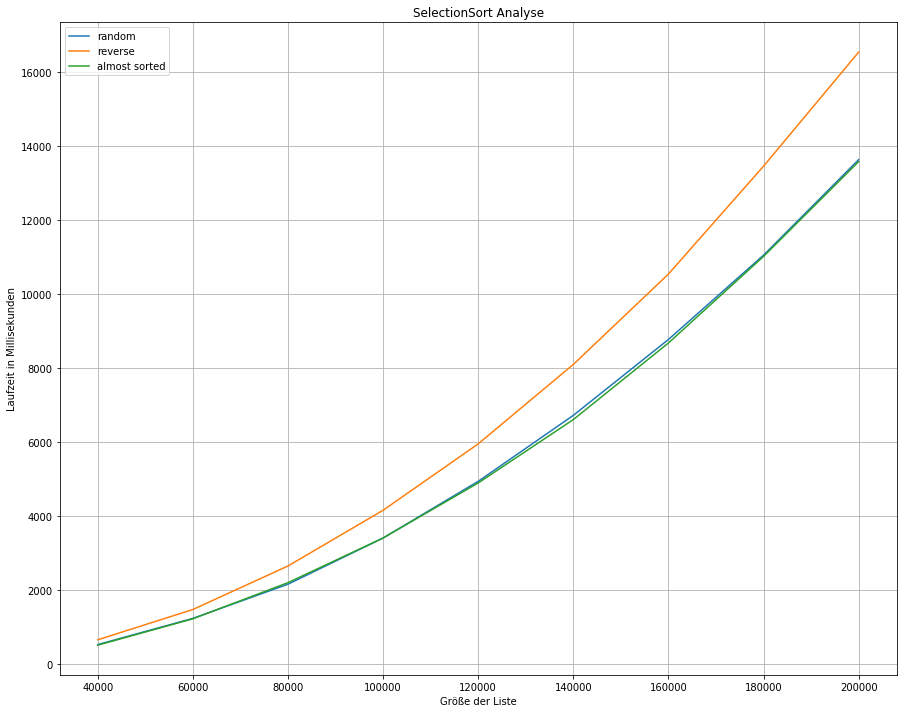

In [30]:
add_plot('FastElements', 'SelectionSort', 'RandomPermutation', 'random')
add_plot('FastElements', 'SelectionSort', 'ReversePermutation', 'reverse')
add_plot('FastElements', 'SelectionSort', 'AlmostSortedPermutation', 'almost sorted')

show_diagram('SelectionSort Analyse')

## FastInsertionSort vs SelectionSort

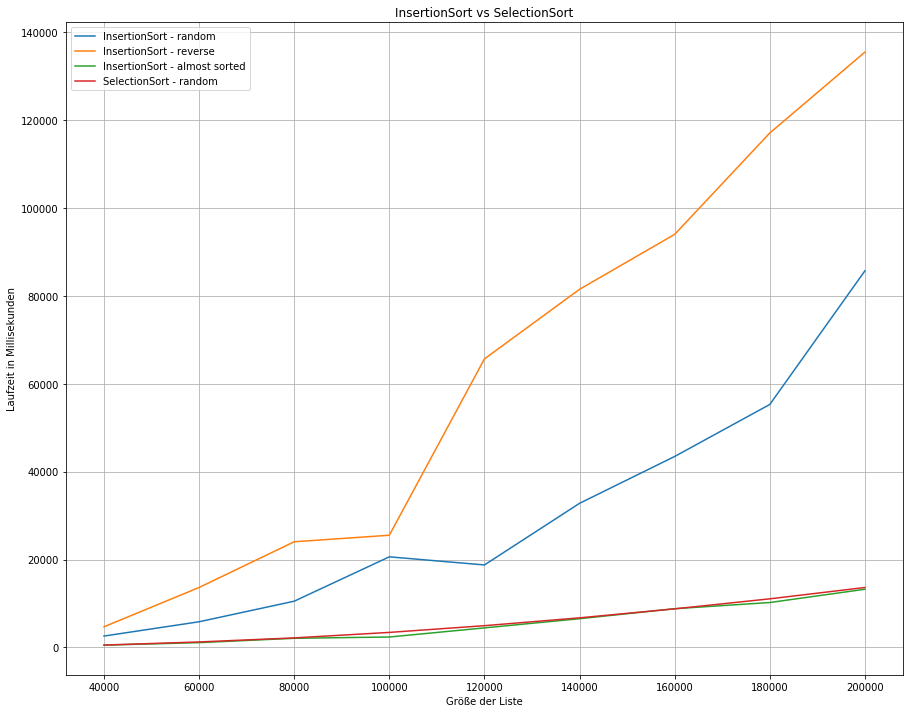

In [31]:
add_plot('FastElements', 'FastInsertionSort', 'RandomPermutation', 'InsertionSort - random')
add_plot('FastElements', 'FastInsertionSort', 'ReversePermutation', 'InsertionSort - reverse')
add_plot('FastElements', 'FastInsertionSort', 'AlmostSortedPermutation', 'InsertionSort - almost sorted')
add_plot('FastElements', 'SelectionSort', 'RandomPermutation', 'SelectionSort - random')

show_diagram('InsertionSort vs SelectionSort')

## Quicksort: iterativ vs rekursiv

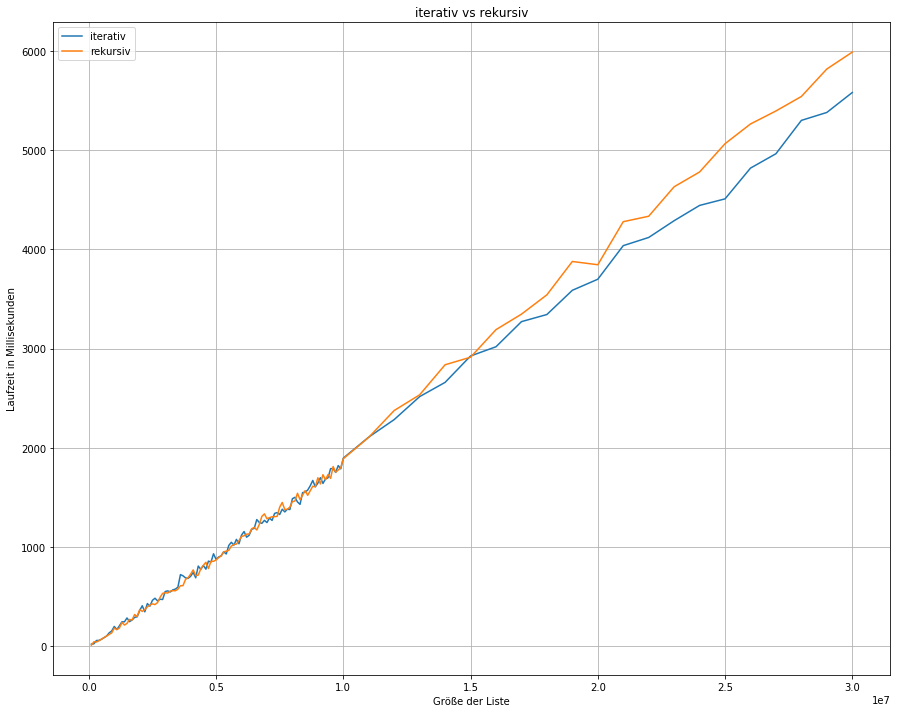

In [32]:
add_plot('FastElements', 'QuickSort(MEDIAN_OF_THREE,Iterative)', 'RandomPermutation', 'iterativ')
add_plot('FastElements', 'QuickSort(MEDIAN_OF_THREE)', 'RandomPermutation', 'rekursiv')

show_diagram('iterativ vs rekursiv')

## Optimize Quicksort

### Iteratives Quicksort vs SelectionSort

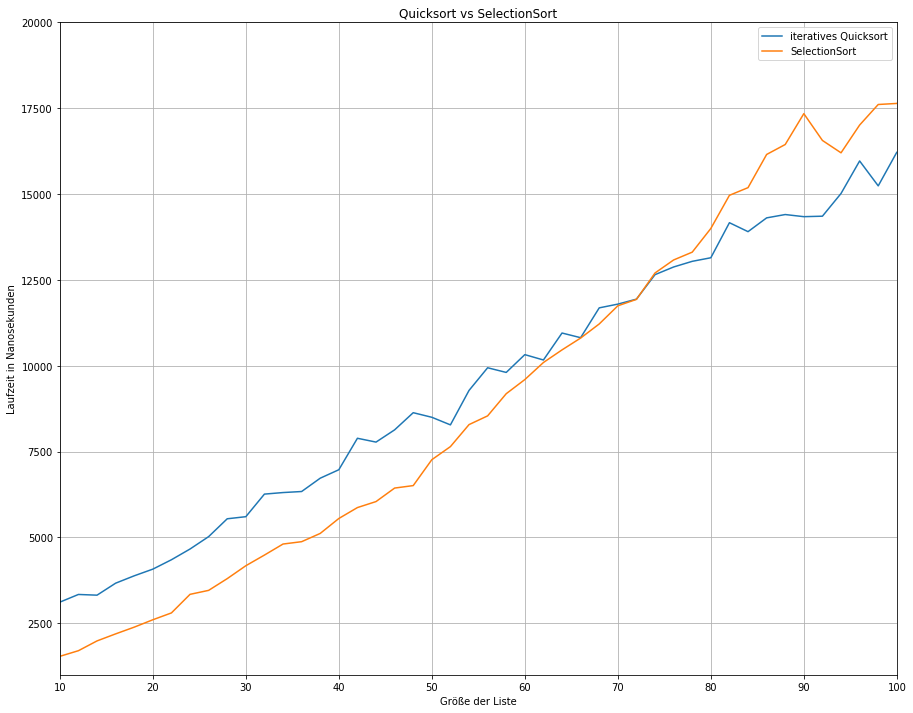

In [82]:
raw_data_nano = pd.read_csv('data/Analyse_nano.csv', header=None)
raw_data_nano.columns = ['list_type', 'sort', 'permutation', 'size', 'comparison', 'time', 'pivot']

data_nano = raw_data_nano.groupby(['list_type', 'sort', 'permutation', 'size']).mean()

y = data_nano.loc['FastElements', 'QuickSort(MEDIAN_OF_THREE,Iterative)', 'RandomPermutation']['time'] 
x = y.index.values
plt.plot(x, y, label='iteratives Quicksort')

y = data_nano.loc['FastElements', 'SelectionSort', 'RandomPermutation']['time'] 
x = y.index.values
plt.plot(x, y, label='SelectionSort')

x1,x2,y1,y2 = plt.axis()
plt.axis((10, 100, 1000, 20000))

plt.legend()
plt.title('Quicksort vs SelectionSort')
plt.xlabel('Größe der Liste')
plt.ylabel('Laufzeit in Nanosekunden')
plt.grid()

### OptimizedQuicksort vs Quicksort 

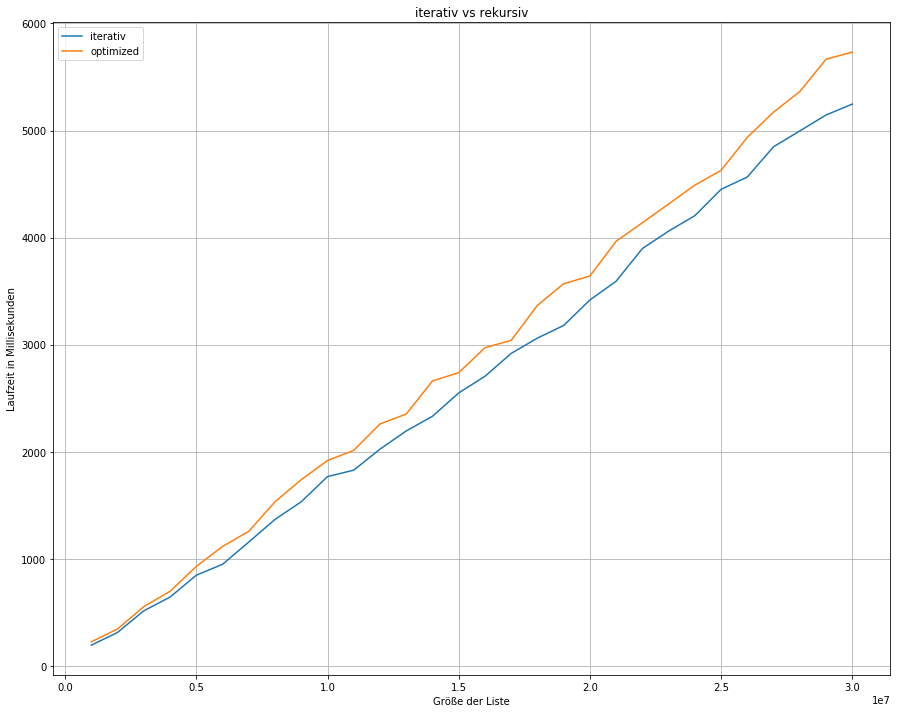

In [86]:
add_plot('FastElements', 'QuickSort(MEDIAN_OF_THREE,Iterative)', 'RandomPermutation', 'iterativ')
add_plot('FastElements', 'OptimizedQuickSort(MEDIAN_OF_THREE,Iterative)', 'RandomPermutation', 'optimized')

show_diagram('iterativ vs rekursiv')